# Another Clustering Technique:


Here is another hierarchical clustering algorithm (specifically, agglomerative clustering) applied to the "nigerian-songs.csv" dataset, along with a visualization of the resulting clusters using a scatter plot:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset
data = pd.read_csv('nigerian-songs.csv')
data

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,Kwaroro,Kwaroro,J. Martins,afro dancehall,2015,193960,10,0.735,0.6320,0.918,0.193000,0.0718,-2.582,0.0355,127.954,4
526,Concert Party,Afro Escape,Various Artists,afro dancehall,2015,252708,0,0.602,0.1770,0.883,0.000004,0.1190,-6.183,0.0778,154.010,4
527,Loko,Applaudise,Iyanya,afro dancehall,2015,223159,0,0.729,0.2380,0.864,0.000000,0.1950,-3.942,0.0668,121.058,4
528,Gift,Applaudise,Iyanya,afro dancehall,2015,278280,0,0.809,0.0490,0.806,0.000000,0.0659,-6.547,0.2340,123.997,4


In [3]:
data.head()

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4


In [4]:
data.describe()

,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
count,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000
mean,2015.390566,222298.169811,17.507547,0.741619,0.265412,0.760623,0.016305,0.147308,-4.953011,0.130748,116.487864,3.986792
std,3.131688,39696.822259,18.992212,0.117522,0.208342,0.148533,0.090321,0.123588,2.464186,0.092939,23.518601,0.333701
min,1998.000000,89488.000000,0.000000,0.255000,0.000665,0.111000,0.000000,0.028300,-19.362000,0.027800,61.695000,3.000000
25%,2014.000000,199305.000000,0.000000,0.681000,0.089525,0.669000,0.000000,0.075650,-6.298750,0.059100,102.961250,4.000000
50%,2016.000000,218509.000000,13.000000,0.761000,0.220500,0.784500,0.000004,0.103500,-4.558500,0.097950,112.714500,4.000000
75%,2017.000000,242098.500000,31.000000,0.829500,0.403000,0.875750,0.000234,0.164000,-3.331000,0.177000,125.039250,4.000000
max,2020.000000,511738.000000,73.000000,0.966000,0.954000,0.995000,0.910000,0.811000,0.582000,0.514000,206.007000,5.000000


In [5]:
data.isnull().sum()

name                0
album               0
artist              0
artist_top_genre    0
release_date        0
length              0
popularity          0
danceability        0
acousticness        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
time_signature      0
dtype: int64

In [6]:
# Extract relevant features
features = data[['popularity', 'danceability']]

In [7]:
# Preprocess the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

In [8]:
# Perform hierarchical clustering
clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
clusters = clustering.fit_predict(scaled_data)


In [9]:
# Add the cluster labels to the dataset
data['Cluster'] = clusters

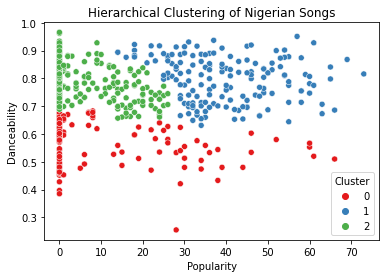

In [10]:
# Visualize the clusters
sns.scatterplot(data=data, x='popularity', y='danceability', hue='Cluster', palette='Set1')
plt.xlabel('Popularity')
plt.ylabel('Danceability')
plt.title('Hierarchical Clustering of Nigerian Songs')
plt.show()